In [58]:
import pickle
import pandas as pd
import numpy as np

with open("gp_model.pk", "rb") as f:
    model = pickle.load(f)

X_test = pd.read_csv("data/test.csv")
y_test = pd.read_csv("data/real_test_result.csv")


In [59]:
features = ['DEN', 'GR', 'NEU', 'PEF', 'RDEP']
y_pred = model.predict(X_test[features])

In [60]:
from sklearn.metrics import r2_score, mean_squared_error

rmse = mean_squared_error(y_pred, y_test, squared=False)

print("rmse: ", rmse)

rmse:  0.08694041260256778


In [61]:
import matplotlib.pyplot as plt
def result_plot(y_predict, y_real, n_points=1000):
    names = ['PHIF', 'SW', 'VSH']
    RMSE, R2 = [], []
    
    for i,name in enumerate(names):
        RMSE.append(mean_squared_error(y_real[i], y_predict[i], squared=False))
        R2.append(r2_score(y_real[i], y_predict[i]))
    
    # check the accuracy of predicted data and plot the result
    print('RMSE:', '{:.5f}'.format(mean_squared_error(y_real, y_predict, squared=False)))
    for i,name in enumerate(names):
        print(f'    {name:5s} : {RMSE[i]:.5f}')
#     print("-"*65)
    
    print( 'R^2: ', r2_score(y_real, y_predict))
    for i,name in enumerate(names):
        print(f'    {name:5s} : {R2[i]:.5f}')
    
    plt.subplots(nrows=3, ncols=2, figsize=(16,16))

    for i,name in enumerate(names):       
        plt.subplot(3, 2, i*2+1)
        plt.plot(y_real[:n_points, i])
        plt.plot(y_predict[:n_points, i])
        plt.legend(['True', 'Predicted'])
        plt.xlabel('Sample')
        plt.ylabel(name)
        plt.title(name+' Prediction Comparison')

        plt.subplot(3, 2, i*2+2)
        plt.scatter(y_real[:, i], y_predict[:, i], alpha=0.01)
        plt.xlabel('Real Value')
        plt.ylabel('Predicted Value')
        plt.title(name+' Prediction Comparison')
    
    plt.show()

In [62]:
y_test

,PHIF,SW,VSH
0,0.066265,1.0000,0.0000
1,0.084434,1.0000,0.0000
2,0.089096,1.0000,0.0000
3,0.048931,1.0000,0.0000
4,0.066265,1.0000,0.0000
...,...,...,...
11270,0.144900,0.9338,0.2643
11271,0.144500,0.9714,0.2670
11272,0.150300,0.9586,0.2491
11273,0.155800,0.9236,0.2374


In [63]:
result = pd.DataFrame(y_pred, columns=y_test.columns)
result.to_csv("predict.csv", index=None)

TypeError: Index(...) must be called with a collection of some kind, False was passed

RMSE: 0.08694
    PHIF  : 0.04595
    SW    : 0.05019
    VSH   : 0.05935
R^2:  0.864366308872027
    PHIF  : 0.98987
    SW    : 0.98771
    VSH   : 0.98275


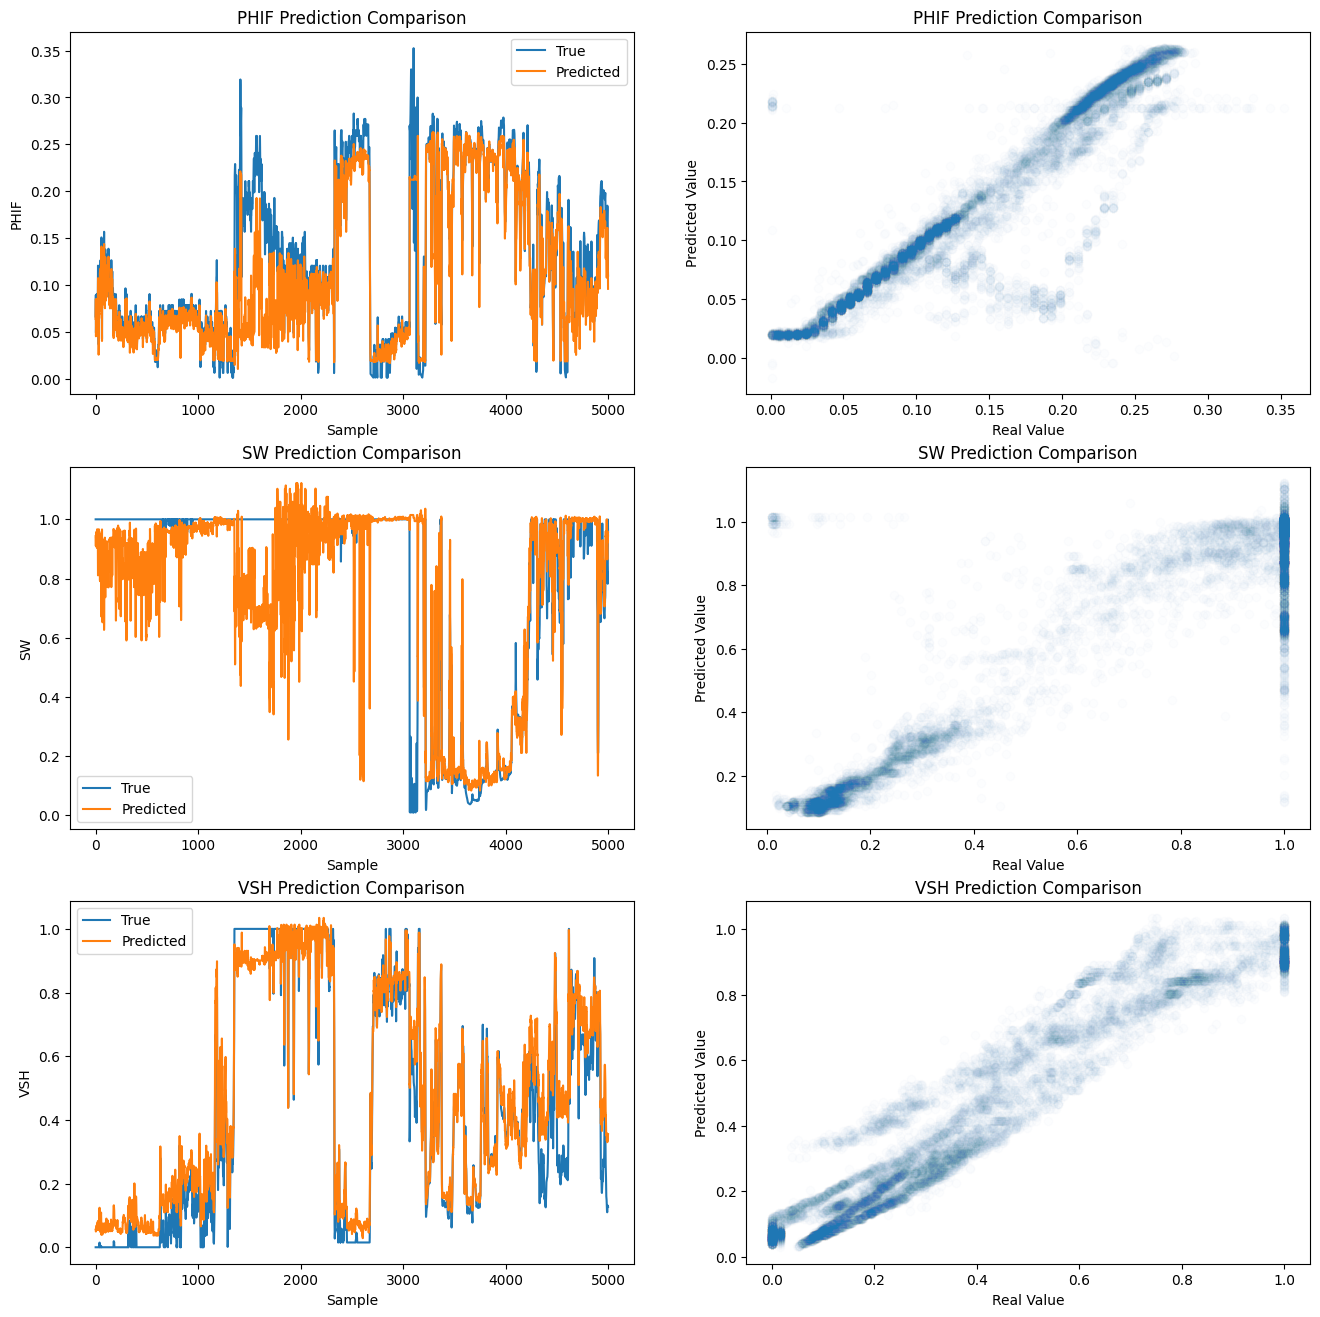

In [ ]:
result_plot(y_pred, y_test.values, n_points=5000)